# Função de Ativação

São funções que definem a decisão da NN. Uma função muito usada é a **Sigmoidal**, onde existem valores variando entre 0 e 1, dando peso a decisão, diferente de um limiar de ativação binário, onde existe apenas 0 e 1.

Por exemplo, ao classificar um ponto utilizando um limiar binário, existe apenas a certeza de ser da classe 1 ou ser da classe 0. Quando é utilizada uma função como a sigmoidal, existe a incerteza, que seria um valor intermediário de 0 e 1, quanto mais próximo de 1, mais certeza da classe e vice-versa.

Outras funções populares:
 - Tanh: Similar à sigmoidal, mas com valores variando entre -1 e 1;
 - ReLU: Valores negativos são zerados, enquanto valores positivos se comportam de forma linear.

In [4]:
import torch
from torch import nn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

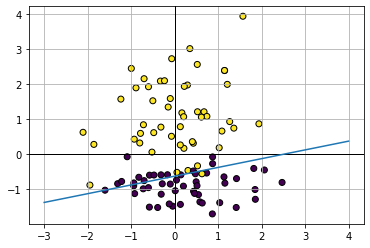

In [74]:
# Função que plota a linha do nosso modelo dados os pesos e o viés:
def plot_model(pontos, classes, w1, w2, b):
    
    np.random.seed(9876)

    plt.scatter(pontos[:,0], pontos[:,1], marker='o', c=classes, edgecolors='k') ## pontos
    
    x = np.linspace(-3, 4, 50)
    y = (-w1 * x - b) / w2

    plt.axvline(0, -1, 1, color='k', linewidth=1)
    plt.axhline(0, -3, 4, color='k', linewidth=1)
    plt.plot(x, y)
    plt.grid(True)

    

np.random.seed(9876)

# x = dados (x1, x2, etc) ou features, são as coordenadas em um plano.
# y = rótulos (cluster 0 ou 1) ou labels, é a classificação do ponto.
X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

w1 = 1
w2 = -4
b = -2.5
plot_model(X, Y, w1, w2, b)

In [41]:
perceptron = nn.Linear(2, 1)  # Duas dimensões na entrada e uma dimensão na saída
sigmoide = nn.Sigmoid() # Função de ativação

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[0.0405, 0.1832]])
tensor([0.1264])


Sem o treinamento, os pesos são atribuídos aleatóriamente. Dessa forma, queremos utilizar os pesos encontrados manualmente:
- w1 = 1
- w2 = -4
- b = -2.5

In [72]:
w1 = 1
w2 = -5
b = -2.5

pesos = torch.Tensor([[w1, w2]])
vies = torch.Tensor([b])

perceptron.weight = nn.Parameter(pesos)
perceptron.bias = nn.Parameter(vies)

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[ 1., -5.]])
tensor([-2.5000])


Agora, vamos selecionar alguns pontos da lista de pontos e passá-los pelo perceptron utilizando a função de ativação sigmoide. Índices dos pontos escolhidos:
- 17, 21, 43, 66

obs: Esses são índices da lista X.

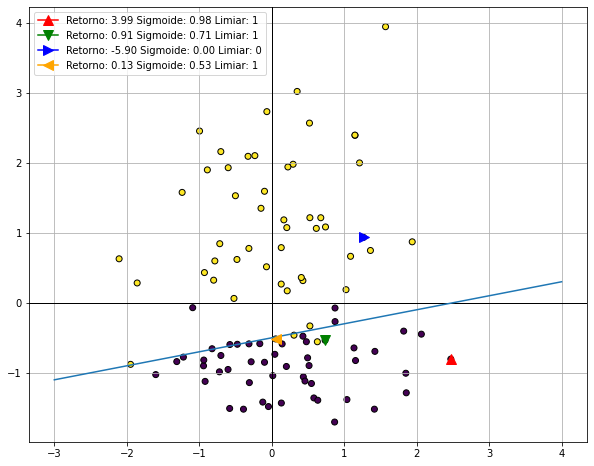

In [73]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'orange']

plt.figure(figsize=(10,8))
plot_model(X, Y, w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
    ponto = torch.Tensor(X[idx]) ## Tensor contendo as coordenadas do ponto
    
    retorno = perceptron(ponto)
    ativacao = sigmoide(retorno)

    if retorno.data < 0: ## abaixo
        ativacao_limiar = 0 
    else: ## acima
        ativacao_limiar = 1

    label = ('Retorno: %.2f Sigmoide: %.2f Limiar: %d' % (retorno.data.numpy()[0], ativacao.data.numpy()[0], ativacao_limiar))
    plt.plot(ponto[0], ponto[1], marker=markers[k], color=colors[k], label=label, markersize=10)

plt.legend()
plt.show()

Pelo gráfico é possível ver que a função sigmoide mostra o quão para um lado o ponto está:

- Ponto vermelho: 5.09 e 0.99, ou seja, está bastante longe da reta para o lado positivo;
- Ponto azul: -3.07 e 0.04, ou seja, está bastante longe da reta para o lado negativo;
- Ponto laranja: 0.13 e 0.53, ou seja, setá bem próximo da reta para o lado positivo. Mas podemos dizer que ele está na zona de confusão.

Quanto mais próximo de 0.5 é o sigmoide de um ponto, mais próximo da reta ele está. Dessa forma, a função sigmoide além de mostrar a classe do ponto, mostra o quão longe ele está do divisor.